# Pytorch快速入门

**Daitu：2505131775@qq.com**

In [1]:
import torch
import torch.nn as nn
from torchvision.transforms import Compose

ModuleNotFoundError: No module named 'torch'

In [2]:
nn.Linear(in_features=10,out_features=10)

Linear(in_features=10, out_features=10, bias=True)

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 张量的数据类型

In [4]:
## 导入需要的库
import torch

In [5]:
## 获取张量的数据类型
torch.tensor([1.2, 3.4]).dtype

torch.float32

In [6]:
## 张量的默认数据类型设置为其它类型
torch.set_default_tensor_type(torch.DoubleTensor)
torch.tensor([1.2, 3.4]).dtype
## 注意：set_default_tensor_type()函数只支持设置浮点类型数据

torch.float64

In [7]:
## 将张量数据类型转化为整型
a = torch.tensor([1.2, 3.4])
print("a.dtype:",a.dtype)
print("a.long()方法:",a.long().dtype)
print("a.int()方法:",a.int().dtype)
print("a.float()方法:",a.float().dtype)

a.dtype: torch.float64
a.long()方法: torch.int64
a.int()方法: torch.int32
a.float()方法: torch.float32


In [8]:
## 恢复torch默认的数据类型
torch.set_default_tensor_type(torch.FloatTensor)
torch.tensor([1.2, 3.]).dtype

torch.float32

In [9]:
## 获取默认的数据类型
torch.get_default_dtype()

torch.float32

## 生成张量

### 基本方法

In [10]:
A = torch.tensor([[1.0,1.0],[2,2]])
A

tensor([[1., 1.],
        [2., 2.]])

In [11]:
## 获取张量的形状
A.shape

torch.Size([2, 2])

In [12]:
## 获取张量的形状
A.size()

torch.Size([2, 2])

In [13]:
## 计算张量中所含元素的个数
A.numel()

4

In [14]:
## 指定张量的数据类型和是否要计算梯度
B = torch.tensor((1,2,3),dtype=torch.float32,requires_grad=True)
B

tensor([1., 2., 3.], requires_grad=True)

In [15]:
## 因为张量B是可计算梯度的，所以可以计算sum(B^2)的梯度
y  = B.pow(2).sum()
y.backward()
B.grad

tensor([2., 4., 6.])

In [16]:
## 注意只有浮点类型的张量允许计算梯度
# B = torch.tensor((1,2,3),dtype=torch.int32,requires_grad=True)

RuntimeError: Only Tensors of floating point dtype can require gradients

In [17]:
## 利用torch.Tensor()获得张量
## 使用预先存在的数据创建张量
C = torch.Tensor([1,2,3,4])
C

tensor([1., 2., 3., 4.])

In [18]:
## 创建具有特定大小的张量
D = torch.Tensor(2,3)
D

tensor([[9.8091e-45, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [19]:
## 创建与另一个张量相同大小和类型相同的张量
torch.ones_like(D)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [20]:
torch.zeros_like(D)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [21]:
torch.rand_like(D)

tensor([[0.2935, 0.4792, 0.8231],
        [0.6154, 0.6985, 0.6298]])

In [22]:
## 创建一个类型相似但尺寸不同的张量
E = [[1,2],[3,4]]
E = D.new_tensor(E)
print("D.dtype : ",D.dtype)
print("E.dtype : ",E.dtype)
E

D.dtype :  torch.float32
E.dtype :  torch.float32


tensor([[1., 2.],
        [3., 4.]])

In [23]:
D.new_full((3,3), fill_value = 1)
D.new_zeros((3,3))
D.new_empty((3,3))
D.new_empty((3,3))

tensor([[0.0000e+00, 2.0000e+00, 0.0000e+00],
        [2.0000e+00, 9.8091e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [24]:
## 利用numpy数组生成张量
import numpy as np
F = np.ones((3,3))
## 使用torch.as_tensor()函数
Ftensor = torch.as_tensor(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [25]:
## 使用torch.from_numpy()函数
Ftensor = torch.from_numpy(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [26]:
## 使用张量的.numpy()将张量转化为numpy数组
Ftensor.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### 随机数生成张量

In [27]:
## 设置随机数种子
torch.manual_seed(123)

In [28]:
## 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean = 0.0,std = torch.tensor(1.0))
A

tensor(-0.1115)

In [29]:
## 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean = 0.0,std=torch.arange(1,5.0))
A

tensor([-0.1115,  0.2407, -1.1089, -0.9617])

In [30]:
torch.manual_seed(123)
A = torch.normal(mean = torch.arange(1,5.0),std=torch.arange(1,5.0))
A

tensor([0.8885, 2.2407, 1.8911, 3.0383])

In [31]:
## 在区间[0,1)上生成服从均匀分布的张量
torch.manual_seed(123)
B = torch.rand(3,4)
B

tensor([[0.2961, 0.5166, 0.2517, 0.6886],
        [0.0740, 0.8665, 0.1366, 0.1025],
        [0.1841, 0.7264, 0.3153, 0.6871]])

In [32]:
## 生成和其它张量尺寸相同的随机数张量
torch.manual_seed(123)
C = torch.ones(2,3)
D = torch.rand_like(C)
D

tensor([[0.2961, 0.5166, 0.2517],
        [0.6886, 0.0740, 0.8665]])

In [33]:
## 生成服从标准正态分布的随机数
print(torch.randn(3,3))
print(torch.randn_like(C))

tensor([[ 0.9447,  0.6217, -1.3501],
        [-0.1881, -2.3891, -0.4759],
        [ 1.7603,  0.6547,  0.5490]])
tensor([[ 0.3671,  0.1219,  0.6466],
        [-1.4168,  0.8429, -0.6307]])


In [34]:
## 将0～10（不包括10）之间的整数随机排序
torch.manual_seed(123)
torch.randperm(10)

tensor([2, 0, 8, 1, 3, 7, 4, 9, 5, 6])

###  其它生成张量的函数

In [35]:
## 使用torch.arange()生成张量
torch.arange(start=0, end = 10, step=2)

tensor([0, 2, 4, 6, 8])

In [36]:
## 在范围内生成固定数量的等间隔张量
torch.linspace(start = 1, end = 10, steps=5)

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

In [37]:
## 生成以对数间隔的点
torch.logspace(start=0.1, end=1.0, steps=5)

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

In [38]:
10**(torch.linspace(start = 0.1, end = 1, steps=5))

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

In [39]:
torch.zeros(3,3)
torch.ones(3,3)
torch.eye(3)
torch.empty(3,3)
torch.full((3,3),fill_value = 0.25)

tensor([[0.2500, 0.2500, 0.2500],
        [0.2500, 0.2500, 0.2500],
        [0.2500, 0.2500, 0.2500]])

## 张量的操作

### 改变张量的尺寸

In [40]:
## 使用tensor.reshape()函数设置张量的尺寸
A = torch.arange(12.0).reshape(3,4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [41]:
## 使用torch.reshape()
torch.reshape(input = A,shape = (2,-1))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [42]:
## 使用resize_方法
A.resize_(2,6)
A

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [43]:
## 使用
B = torch.arange(10.0,19.0).reshape(3,3)
A.resize_as_(B)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [44]:
B

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [45]:
## torch.unsqueeze()返回在指定维度插入尺寸为1的新张量
A = torch.arange(12.0).reshape(2,6)
B = torch.unsqueeze(A,dim = 0)
B.shape

torch.Size([1, 2, 6])

In [46]:
## torch.squeeze()函数移除所有维度为1的维度
C = B.unsqueeze(dim = 3)
print("C.shape : ",C.shape)
D = torch.squeeze(C)
print("D.shape : ",D.shape)
## 移除指定维度为1的维度
E = torch.squeeze(C,dim = 0)
print("E.shape : ",E.shape)

C.shape :  torch.Size([1, 2, 6, 1])
D.shape :  torch.Size([2, 6])
E.shape :  torch.Size([2, 6, 1])


In [47]:
## 使用.expand()方法拓展张量
A = torch.arange(3)
B = A.expand(3,-1)
B

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])

In [48]:
## 使用.expand_as()方法拓展张量
C = torch.arange(6).reshape(2,3)
B = A.expand_as(C)
B

tensor([[0, 1, 2],
        [0, 1, 2]])

In [49]:
## 使用.repeat()方法拓展张量
D = B.repeat(1,2,2)
print(D)
print(D.shape)

tensor([[[0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2]]])
torch.Size([1, 4, 6])


### 获取张量中的元素

In [50]:
## 利用切片和索引获取张量中的元素
A = torch.arange(12).reshape(1,3,4)
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

In [51]:
A[0]

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [52]:
## 获取第0维度下的矩阵前两行元素
A[0,0:2,:]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [53]:
## 获取第0维度下的矩阵，最后一行－4～－1列
A[0,-1,-4:-1]

tensor([ 8,  9, 10])

In [54]:
## 根据条件筛选
B = - A
torch.where(A>5,A,B)

tensor([[[ 0, -1, -2, -3],
         [-4, -5,  6,  7],
         [ 8,  9, 10, 11]]])

In [55]:
## 获取A中大于5的元素
A[ A > 5]

tensor([ 6,  7,  8,  9, 10, 11])

In [56]:
## 获取其中的某个元素
A[0,2,3]

tensor(11)

In [57]:
## 获取矩阵张量的下三角部分
torch.tril(A,diagonal=0,)

tensor([[[ 0,  0,  0,  0],
         [ 4,  5,  0,  0],
         [ 8,  9, 10,  0]]])

In [58]:
## diagonal参数控制要考虑的对角线
torch.tril(A,diagonal=1)

tensor([[[ 0,  1,  0,  0],
         [ 4,  5,  6,  0],
         [ 8,  9, 10, 11]]])

In [59]:
## 获取矩阵张量的上三角部分
torch.triu(A,diagonal=0)

tensor([[[ 0,  1,  2,  3],
         [ 0,  5,  6,  7],
         [ 0,  0, 10, 11]]])

In [60]:
## 获取矩阵张量的上三角部分,input,需要是一个二维的张量
C = A.reshape(3,4)
print(C)
print(torch.diag(C,diagonal=0))
print(torch.diag(C,diagonal=1))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([ 0,  5, 10])
tensor([ 1,  6, 11])


In [61]:
## 提供对角线元素生成矩阵张量
torch.diag(torch.tensor([1,2,3]))

tensor([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])

### 拼接和拆分

In [62]:
## 在给定维度中连接给定的张量序列
A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(0,10,6).reshape(2,3)
## 在0纬度连接张量
C = torch.cat((A,B),dim=0)
C

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [63]:
## 在1纬度连接张量
D = torch.cat((A,B),dim=1)
D

tensor([[ 0.,  1.,  2.,  0.,  2.,  4.],
        [ 3.,  4.,  5.,  6.,  8., 10.]])

In [64]:
## 在1纬度连接3个张量
E = torch.cat((A[:,1:2],A,B),dim=1)
E

tensor([[ 1.,  0.,  1.,  2.,  0.,  2.,  4.],
        [ 4.,  3.,  4.,  5.,  6.,  8., 10.]])

In [65]:
## 沿新维度连接张量
F = torch.stack((A,B),dim=0)
print(F)
print(F.shape)
## 2个2＊3的矩阵组合在一起

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]])
torch.Size([2, 2, 3])


In [66]:
G = torch.stack((A,B),dim=2)
print(G)
print(G.shape)
## 2＊3*2的矩阵组合在一起

tensor([[[ 0.,  0.],
         [ 1.,  2.],
         [ 2.,  4.]],

        [[ 3.,  6.],
         [ 4.,  8.],
         [ 5., 10.]]])
torch.Size([2, 3, 2])


In [67]:
## 将张量分割为特定数量的块
## 在行上将张量E分为两块
torch.chunk(E,2,dim=0)

(tensor([[1., 0., 1., 2., 0., 2., 4.]]),
 tensor([[ 4.,  3.,  4.,  5.,  6.,  8., 10.]]))

In [68]:
D1,D2 = torch.chunk(D,2,dim=1)
print(D1)
print(D2)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


In [69]:
## 如果沿给定维度dim的张量大小不能被块整除，则最后一个块将最小
E1,E2,E3 = torch.chunk(E,3,dim=1)
print(E1)
print(E2)
print(E3)

tensor([[1., 0., 1.],
        [4., 3., 4.]])
tensor([[2., 0., 2.],
        [5., 6., 8.]])
tensor([[ 4.],
        [10.]])


In [70]:
## 将张量切分为块,指定每个块的大小
D1,D2,D3 = torch.split(D,[1,2,3],dim=1)
print(D1)
print(D2)
print(D3)

tensor([[0.],
        [3.]])
tensor([[1., 2.],
        [4., 5.]])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


## 张量计算

### 比较大小

$\lvert \text{self} - \text{other} \rvert \leq \texttt{atol} + \texttt{rtol} \times \lvert \text{other} \rvert$$

In [71]:
## 比较两个数是否接近
A = torch.tensor([10.0])
B = torch.tensor([10.1])
print(torch.allclose(A, B, rtol=1e-05, atol=1e-08, equal_nan=False))
print(torch.allclose(A, B, rtol=0.1, atol=0.01, equal_nan=False))

False
True


In [72]:
## 如果equal_nan=True，那么缺失值可以判断接近
A  = torch.tensor(float("nan"))
print(torch.allclose(A, A,equal_nan=False))
print(torch.allclose(A, A,equal_nan=True))

False
True


In [73]:
## 计算元素是否相等
A = torch.tensor([1,2,3,4,5,6])
B = torch.arange(1,7)
C = torch.unsqueeze(B,dim = 0)
print(torch.eq(A,B))
print(torch.eq(A,C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])


In [74]:
## 判断两个张量是否具有相同的尺寸和元素
print(torch.equal(A,B))
print(torch.equal(A,C))

True
False


In [75]:
## 逐元素比较大于等于
print(torch.ge(A,B))
print(torch.ge(A,C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])


In [76]:
## 大于
print(torch.gt(A,B))
print(torch.gt(A,C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [77]:
## 小于等于
print(torch.le(A,B))
print(torch.lt(A,C))

tensor([True, True, True, True, True, True])
tensor([[False, False, False, False, False, False]])


In [78]:
## 不等于
print(torch.ne(A,B))
print(torch.ne(A,C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [79]:
## 判断是否为缺失值
torch.isnan(torch.tensor([0,1,float("nan"),2]))

tensor([False, False,  True, False])

### 基本运算

In [80]:
## 矩阵逐元素相乘
A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(10,20,steps=6).reshape(2,3)
print("A:",A)
print("B:",B)
print(A * B)
## 逐元素相除
print(A / B)

A: tensor([[0., 1., 2.],
        [3., 4., 5.]])
B: tensor([[10., 12., 14.],
        [16., 18., 20.]])
tensor([[  0.,  12.,  28.],
        [ 48.,  72., 100.]])
tensor([[0.0000, 0.0833, 0.1429],
        [0.1875, 0.2222, 0.2500]])


In [81]:
## 逐元素相加
print(A + B)
## 逐元素相减
print(A - B)
## 逐元素整除
print(B//A)

tensor([[10., 13., 16.],
        [19., 22., 25.]])
tensor([[-10., -11., -12.],
        [-13., -14., -15.]])
tensor([[inf, 12.,  7.],
        [ 5.,  4.,  4.]])


In [82]:
## 张量的幂
print(torch.pow(A,3))
print(A ** 3)

tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])
tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])


In [83]:
## 张量的指数
torch.exp(A)

tensor([[  1.0000,   2.7183,   7.3891],
        [ 20.0855,  54.5982, 148.4132]])

In [84]:
## 张量的对数
torch.log(A)

tensor([[  -inf, 0.0000, 0.6931],
        [1.0986, 1.3863, 1.6094]])

In [85]:
## 张量的平方根
print(torch.sqrt(A))
print(A**0.5)

tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361]])
tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361]])


In [86]:
## 张量的平方根倒数
print(torch.rsqrt(A))
print( 1 / (A**0.5))

tensor([[   inf, 1.0000, 0.7071],
        [0.5774, 0.5000, 0.4472]])
tensor([[   inf, 1.0000, 0.7071],
        [0.5774, 0.5000, 0.4472]])


In [87]:
## 张量数据裁剪
torch.clamp_max(A,4)

tensor([[0., 1., 2.],
        [3., 4., 4.]])

In [88]:
## 张量数据裁剪
torch.clamp_min(A,3)

tensor([[3., 3., 3.],
        [3., 4., 5.]])

In [89]:
## 张量数据裁剪
torch.clamp(A,2.5,4)

tensor([[2.5000, 2.5000, 2.5000],
        [3.0000, 4.0000, 4.0000]])

In [90]:
## 矩阵的转置
C = torch.t(A)
C

tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])

In [91]:
## 矩阵运算，矩阵相乘,A的行数要等于C的列数
A.matmul(C)

tensor([[ 5., 14.],
        [14., 50.]])

In [92]:
A = torch.arange(12.0).reshape(2,2,3)
B = torch.arange(12.0).reshape(2,3,2)
AB = torch.matmul(A,B)
AB

tensor([[[ 10.,  13.],
         [ 28.,  40.]],

        [[172., 193.],
         [244., 274.]]])

In [93]:
## 矩阵相乘只计算最后面的两个纬度的乘法
print(AB[0].eq(torch.matmul(A[0],B[0])))
print(AB[1].eq(torch.matmul(A[1],B[1])))

tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])


In [94]:
## 计算矩阵的逆
C = torch.rand(3,3)
D = torch.inverse(C)
torch.mm(C,D)

tensor([[ 1.0000e+00,  1.7502e-08, -8.7483e-08],
        [ 1.8397e-08,  1.0000e+00, -4.0170e-08],
        [-4.5937e-08,  7.6177e-08,  1.0000e+00]])

In [95]:
## 计算张量矩阵的迹，对角线元素的和
torch.trace(torch.arange(9.0).reshape(3,3))

tensor(12.)

### 统计相关的计算

In [96]:
## 1维张量的最大值和最小值
A = torch.tensor([12.,34,25,11,67,32,29,30,99,55,23,44])
## 最大值及位置
print("最大值:",A.max())
print("最大值位置:",A.argmax())
## 最小值及位置
print("最小值:",A.min())
print("最小值位置:",A.argmin())

最大值: tensor(99.)
最大值位置: tensor(8)
最小值: tensor(11.)
最小值位置: tensor(3)


In [97]:
## 2维张量的最大值和最小值
B = A.reshape(3,4)
print("2-D张量B:\n",B)
## 最大值及位置(每行)
print("最大值:\n",B.max(dim=1))
print("最大值位置:",B.argmax(dim=1))
## 最小值及位置(每列)
print("最小值:\n",B.min(dim=0))
print("最小值位置:",B.argmin(dim=0))

2-D张量B:
 tensor([[12., 34., 25., 11.],
        [67., 32., 29., 30.],
        [99., 55., 23., 44.]])
最大值:
 torch.return_types.max(
values=tensor([34., 67., 99.]),
indices=tensor([1, 0, 0]))
最大值位置: tensor([1, 0, 0])
最小值:
 torch.return_types.min(
values=tensor([12., 32., 23., 11.]),
indices=tensor([0, 1, 2, 0]))
最小值位置: tensor([0, 1, 2, 0])


In [98]:
## 张量排序,分别输出从小到大的排序结果和相应的元素在元素位置的索引
torch.sort(A)

torch.return_types.sort(values=tensor([11., 12., 23., 25., 29., 30., 32., 34., 44., 55., 67., 99.]), indices=tensor([ 3,  0, 10,  2,  6,  7,  5,  1, 11,  9,  4,  8]))

In [99]:
## 按照降序排列
torch.sort(A,descending=True)

torch.return_types.sort(values=tensor([99., 67., 55., 44., 34., 32., 30., 29., 25., 23., 12., 11.]), indices=tensor([ 8,  4,  9, 11,  1,  5,  7,  6,  2, 10,  0,  3]))

In [100]:
## 对2-D张量进行排序
Bsort, Bsort_id= torch.sort(B)
print("B sort:\n",Bsort)
print("B sort index:\n",Bsort_id)
print("B argsort:\n",torch.argsort(B))

B sort:
 tensor([[11., 12., 25., 34.],
        [29., 30., 32., 67.],
        [23., 44., 55., 99.]])
B sort index:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])
B argsort:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])


In [101]:
## 获取张量前几个大的数值
torch.topk(A,4)

torch.return_types.topk(values=tensor([99., 67., 55., 44.]), indices=tensor([ 8,  4,  9, 11]))

In [102]:
## 获取2D张量每列前几个大的数值
Btop2,Btop2_id = torch.topk(B,2,dim=0)
print("B 每列 top2:\n",Btop2)
print("B 每列 top2 位置:\n",Btop2_id)

B 每列 top2:
 tensor([[99., 55., 29., 44.],
        [67., 34., 25., 30.]])
B 每列 top2 位置:
 tensor([[2, 2, 1, 2],
        [1, 0, 0, 1]])


In [103]:
## 获取张量第K小的数值和位置
torch.kthvalue(A,3)

torch.return_types.kthvalue(values=tensor(23.), indices=tensor(10))

In [104]:
## 获取2D张量第K小的数值和位置
torch.kthvalue(B,3,dim = 1)

torch.return_types.kthvalue(values=tensor([25., 32., 55.]), indices=tensor([2, 1, 1]))

In [105]:
## 获取2D张量第K小的数值和位置
Bkth,Bkth_id = torch.kthvalue(B,3,dim = 1,keepdim=True)
Bkth

tensor([[25.],
        [32.],
        [55.]])

In [106]:
## 平均值,计算每行的均值
print(torch.mean(B,dim = 1,keepdim = True))
## 平均值,计算每列的均值
print(torch.mean(B,dim = 0,keepdim = True))

tensor([[20.5000],
        [39.5000],
        [55.2500]])
tensor([[59.3333, 40.3333, 25.6667, 28.3333]])


In [107]:
## 计算每行的和
print(torch.sum(B,dim = 1,keepdim = True))
## 计算每列的和
print(torch.sum(B,dim = 0,keepdim = True))

tensor([[ 82.],
        [158.],
        [221.]])
tensor([[178., 121.,  77.,  85.]])


In [108]:
## 按照行计算累加和
print(torch.cumsum(B,dim = 1))
## 按照列计算累加和
print(torch.cumsum(B,dim = 0))

tensor([[ 12.,  46.,  71.,  82.],
        [ 67.,  99., 128., 158.],
        [ 99., 154., 177., 221.]])
tensor([[ 12.,  34.,  25.,  11.],
        [ 79.,  66.,  54.,  41.],
        [178., 121.,  77.,  85.]])


In [109]:
## 计算每行的中位数
print(torch.median(B,dim = 1,keepdim = True))
## 计算每列的中位数
print(torch.median(B,dim = 0,keepdim = True))

torch.return_types.median(
values=tensor([[12.],
        [30.],
        [44.]]),
indices=tensor([[0],
        [3],
        [3]]))
torch.return_types.median(
values=tensor([[67., 34., 25., 30.]]),
indices=tensor([[1, 0, 0, 1]]))


In [110]:
## 按照行计算乘积
print(torch.prod(B,dim = 1,keepdim = True))
## 按照列计算乘积
print(torch.prod(B,dim = 0,keepdim = True))

tensor([[ 112200.],
        [1865280.],
        [5510340.]])
tensor([[79596., 59840., 16675., 14520.]])


In [111]:
## 按照行计算累乘积
print(torch.cumprod(B,dim = 1))
## 按照列计算累乘积
print(torch.cumprod(B,dim = 0))

tensor([[1.2000e+01, 4.0800e+02, 1.0200e+04, 1.1220e+05],
        [6.7000e+01, 2.1440e+03, 6.2176e+04, 1.8653e+06],
        [9.9000e+01, 5.4450e+03, 1.2524e+05, 5.5103e+06]])
tensor([[1.2000e+01, 3.4000e+01, 2.5000e+01, 1.1000e+01],
        [8.0400e+02, 1.0880e+03, 7.2500e+02, 3.3000e+02],
        [7.9596e+04, 5.9840e+04, 1.6675e+04, 1.4520e+04]])


In [112]:
## 标准差
torch.std(A)

tensor(25.0108)

## Pytorch中的自动微分

In [113]:
## torch.autograd.backward()函数计算网络图中给定张量的和
## 如计算 y = sum(x^2+2*x+1)
x = torch.tensor([[1.0,2.0],[3.0,4.0]],requires_grad=True) ## 默认requires_grad＝False
y = torch.sum(x**2+2*x+1)
print("x.requires_grad:",x.requires_grad)
print("y.requires_grad:",y.requires_grad)
print("x:",x)
print("y:",y)


x.requires_grad: True
y.requires_grad: True
x: tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
y: tensor(54., grad_fn=<SumBackward0>)


In [114]:
## 计算y在x上的梯度
y.backward()
x.grad

tensor([[ 4.,  6.],
        [ 8., 10.]])

## torch.nn模块

### torch.nn.Conv2d()

使用一张图像来展示经过卷积后的图像效果


使用灰度图像



In [37]:
!pip list
#如果能看到torch那就非常正常，不用运行下面的命令啦，直接运行import torch

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
audioread                     3.0.1
Automat  

In [13]:
#如果使用jupyter
!pip install Cython --user
#为解决上述问题，运行此条命令
#事实证明，没什么用

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [5]:
!pip uninstall torch
#执行import torch又报错，NameError: name '_C' is not defined
#无奈，卸载重装吧

^C


In [ ]:
!pip install torch#直接执行这条命令
#Successfully installed torch-2.1.2

In [2]:
!jupyter kernelspec list#查看可用的内核


Available kernels:
  py37       C:\Users\Administrator\AppData\Roaming\jupyter\kernels\py37
  python3    C:\ProgramData\anaconda3\share\jupyter\kernels\python3


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [4]:
import torch

NameError: name '_C' is not defined

In [7]:
## 使用一张图像来展示经过卷机后的图像效果
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image


NameError: name '_C' is not defined

In [8]:
import numpy as np

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "C:\Users\Administrator\miniconda3\envs\py37\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: 找不到指定的模块。


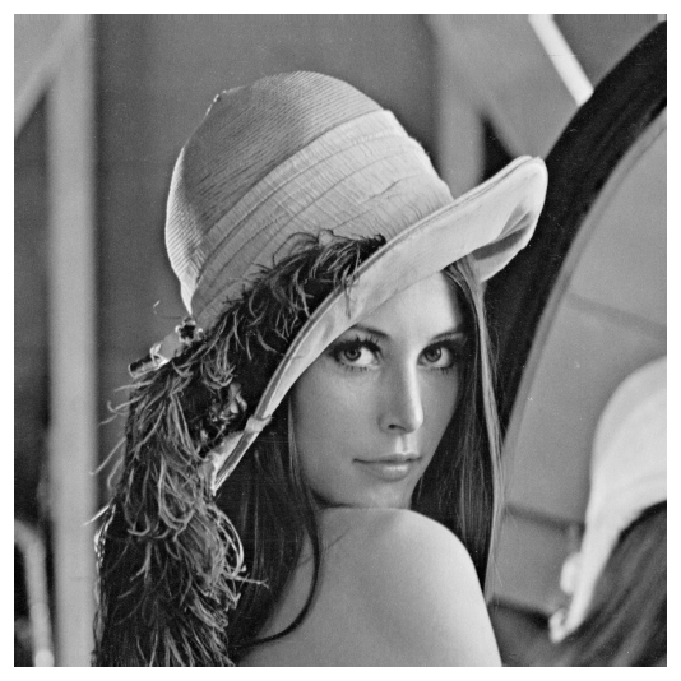

In [116]:
## 读取图像－转化为灰度图片－转化为numpy数组
myim = Image.open("data/chap2/Lenna.png")
myimgray = np.array(myim.convert("L"),dtype=np.float32)
## 可视化图片
plt.figure(figsize=(6,6))
plt.imshow(myimgray,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

```python
## 导入所需的库
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 读取图像－转化为灰度图片－转化为numpy数组
myim = Image.open("data/chap2/Lenna.png")  # 打开图像文件，创建一个名为myim的PIL.Image对象
myimgray = np.array(myim.convert("L"),dtype=np.float32)  # 将myim对象转换为灰度图像，并将其转换为具有float32数据类型的NumPy数组

## 可视化图片
plt.figure(figsize=(6,6))  # 创建一个宽度和高度均为6英寸的图像窗口
plt.imshow(myimgray,cmap=plt.cm.gray)  # 在图像窗口中显示myimgray数组，并使用灰度颜色映射（colormap）
plt.axis("off")  # 关闭坐标轴的显示
plt.show()  # 显示图像窗口
```

此代码段打开一幅图像，并将其转换为灰度图像。然后，使用matplotlib库在一个图像窗口中显示灰度图像。以下是每行代码的说明：

1. 导入所需的库：```numpy```用于处理数组操作,```PIL```提供了处理图像的功能,```matplotlib.pyplot```用于可视化图像。
2. 读取图像并转换为灰度图像和numpy数组：
   - ```Image.open("data/chap2/Lenna.png")``` 打开名为"Lenna.png"的图像文件，创建一个名为"myim"的PIL.Image对象。
   - ```myim.convert("L")``` 将myim对象转换为灰度图像。
   - ```np.array(...)``` 将灰度图像转化为NumPy数组，并使用```np.float32```指定数组的数据类型为float32。
   - 最后将灰度图像的NumPy数组存储在名为"myimgray"的变量中。
3. 可视化图片：
   - ```plt.figure(figsize=(6,6))``` 创建一个宽度和高度均为6英寸的图像窗口。
   - ```plt.imshow(myimgray,cmap=plt.cm.gray)``` 在图像窗口中显示名为"myimgray"的NumPy数组，并使用灰度颜色映射（colormap）。
   - ```plt.axis("off")``` 关闭坐标轴的显示。
   - ```plt.show()``` 显示图像窗口。

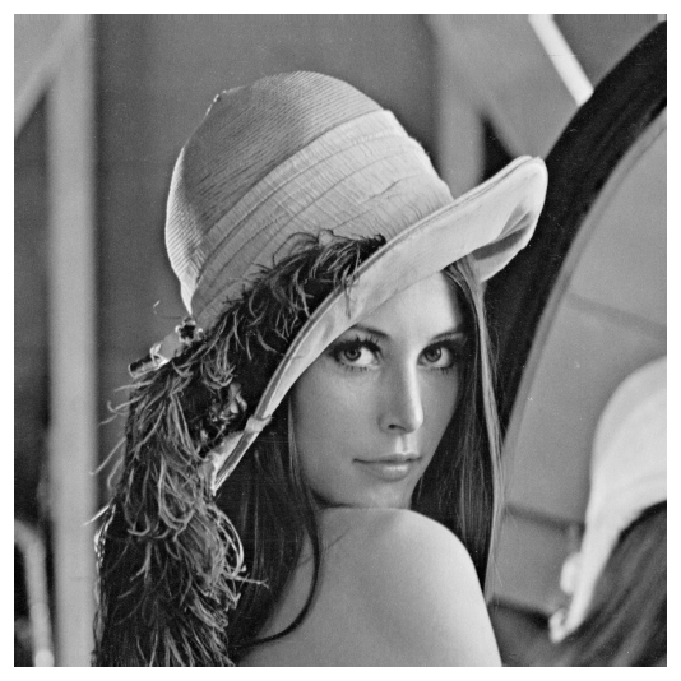

In [116]:
## 读取图像－转化为灰度图片－转化为numpy数组
myim = Image.open(r"C:\Users\Administrator\Desktop\teacher_tang\《PyTorch深度学习入门与实践》\请用电脑客户端勾选本文件夹整体下载！PyTorch深度学习入门与实战【配套资源】\程序\programs.7z\programs\data\chap2\Lenna.png")
myimgray = np.array(myim.convert("L"),dtype=np.float32)
## 可视化图片
plt.figure(figsize=(6,6))
plt.imshow(myimgray,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

这段代码用于读取图像、将其转化为灰度图片，并将其可视化。下面是对代码逐行进行注释解释：

```python
## 读取图像－转化为灰度图片－转化为numpy数组
myim = Image.open(r"C:\Users\Administrator\Desktop\teacher_tang\《PyTorch深度学习入门与实践》\请用电脑客户端勾选本文件夹整体下载！PyTorch深度学习入门与实战【配套资源】\程序\programs.7z\programs\data\chap2\Lenna.png")
myimgray = np.array(myim.convert("L"), dtype=np.float32)
```

在这部分代码中，我们首先使用`Image.open()`函数来打开图像文件，文件路径为`C:\Users\Administrator\Desktop\teacher_tang\《...》\Lenna.png`（注意这是一个示例路径，实际路径可能不同）。然后，我们通过`.convert("L")`将图像转换为灰度图像。最后，使用`np.array()`将图像转换为Numpy数组，并将数据类型设置为`float32`。结果保存在变量`myimgray`中。

```python
## 可视化图片
plt.figure(figsize=(6,6))
plt.imshow(myimgray, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
```

这部分代码用于将灰度图像可视化。首先，创建一个图形窗口，大小为`(6, 6)`。然后，使用`imshow()`函数将灰度图像显示在窗口中，利用`cmap=plt.cm.gray`参数来指定使用灰度色彩映射。接下来，通过`plt.axis("off")`关闭坐标轴的显示。最后，使用`plt.show()`来显示图像。

In [117]:
h,w = myimgray.shape
h,w

(512, 512)

这段代码用于获取灰度图像的高度和宽度。

1. `myimgray.shape`返回一个元组，包含了灰度图像的维度信息。第一个元素是图像的高度，第二个元素是图像的宽度。

2. 我们通过将元组的两个值分别赋给变量`h`和`w`来获取图像的高度和宽度。

3. 最后两行代码是为了验证以上操作，将`h`和`w`作为表达式进行了打印输出。

In [118]:
## 对灰度图像进行卷积提取图像轮廓
## 将数组转化为张量
imh,imw = myimgray.shape
myimgray_t = torch.from_numpy(myimgray.reshape((1,1,imh,imw)))
myimgray_t.shape
## 因为卷积时需要操作一张图像，所以将图像转化为4维表示［batch，channel,h,w］

torch.Size([1, 1, 512, 512])

这段代码用于将灰度图像转换为张量，并将其维度调整为适合进行卷积操作的形式。下面是对代码逐行进行注释解释：

```python
## 将数组转化为张量
imh, imw = myimgray.shape
myimgray_t = torch.from_numpy(myimgray.reshape((1, 1, imh, imw)))
```

在这部分代码中，首先获取灰度图像的高度和宽度，分别赋值给`imh`和`imw`。然后，使用`reshape()`函数将灰度图像的形状调整为`(1, 1, imh, imw)`，其中:
- `1`表示batch维度，表示处理的图像个数为1。
- `1`表示channel维度，表示图像通道数为1（因为是灰度图像，所以图像通道数为1，如果是RGB图像，则图像通道数为3）。
- `imh`和`imw`分别表示图像的高度和宽度。

最后，使用`torch.from_numpy()`将Numpy数组转换为张量，并将结果保存在变量`myimgray_t`中。

```python
myimgray_t.shape
```

这行代码用于打印输出`myimgray_t`张量的形状，即`(1, 1, imh, imw)`，以确认张量的维度信息是否正确。

```python
## 因为卷积时需要操作一张图像，所以将图像转化为4维表示［batch，channel,h,w］
```

这行注释解释了为什么要将图像转换为4维表示。在卷积操作中，我们需要用一个张量进行卷积操作，张量的维度一般是`(batch, channel, height, width)`。因此，为了满足卷积操作的需求，将图像转换为4维表示。

In [119]:
## 定义边缘检测卷积核,并纬度处理为1*1*5*5
kersize = 5
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
ker[2,2] = 24
ker = ker.reshape((1,1,kersize,kersize))
## 进行卷积操作
conv2d = nn.Conv2d(1,1,(kersize,kersize),bias = False)
## 设置卷积时使用的核
conv2d.weight.data = ker
## 对灰度图像进行卷积操作
imconv2dout = conv2d(myimgray_t)
## 对卷积后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
print("卷积后尺寸:",imconv2dout_im.shape)

卷积后尺寸: torch.Size([508, 508])


这段代码是使用PyTorch库进行边缘检测的操作。下面是对代码逐行进行注释解释：

```python
## 定义边缘检测卷积核,并纬度处理为1*1*5*5
kersize = 5
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
ker[2,2] = 24
ker = ker.reshape((1,1,kersize,kersize))
```
在这部分代码中，我们首先定义了一个大小为`5x5`的卷积核`ker`，初始值都设置为`-1`。然后我们将中心元素设为`24`，这样可以使得边缘检测具有更高的权重。最后，我们通过`reshape`函数将卷积核的维度调整为`(1, 1, 5, 5)`。

```python
## 进行卷积操作
conv2d = nn.Conv2d(1, 1, (kersize, kersize), bias=False)
```
这行代码用于创建一个`Conv2d`对象，它表示一个二维卷积层。参数`1, 1`表示输入和输出的通道数，这里都是1，因为我们处理的是灰度图像。`(kersize, kersize)`表示卷积核的大小，即`(5, 5)`。`bias=False`表示不使用偏置项。

```python
## 设置卷积时使用的核
conv2d.weight.data = ker
```
这行代码将之前定义的卷积核`ker`赋值给我们创建的卷积层对象`conv2d`的权重属性`weight.data`，以便在卷积操作时使用。

```python
## 对灰度图像进行卷积操作
imconv2dout = conv2d(myimgray_t)
```
这行代码对灰度图像`myimgray_t`进行卷积操作，结果存储在变量`imconv2dout`中。

```python
## 对卷积后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
```
这行代码将卷积后的输出通过`squeeze()`函数进行维度压缩，去除维度为1的尺寸。

```python
print("卷积后尺寸:", imconv2dout_im.shape)
```
最后，代码打印出卷积后的输出的尺寸。

In [120]:
## 查看使用的卷积核
conv2d.weight.data

tensor([[[[-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., 24., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.]]]])

这行代码用于查看所使用的卷积核（权重）。下面是对代码进行注释解释：

```python
conv2d.weight.data
```

这行代码访问了`conv2d`对象的权重数据。`conv2d`是一个`Conv2d`对象，表示一个二维卷积层。`weight`属性表示卷积层的权重参数。通过`.data`属性可以获取该权重参数的值。

该行代码的输出将显示形状为`(1, 1, kersize, kersize)`的张量，其中：
- `1` 表示该卷积层所使用的输入通道数。
- `kersize` 表示卷积核的尺寸。
- `(kersize, kersize)` 表示卷积核的高度和宽度。

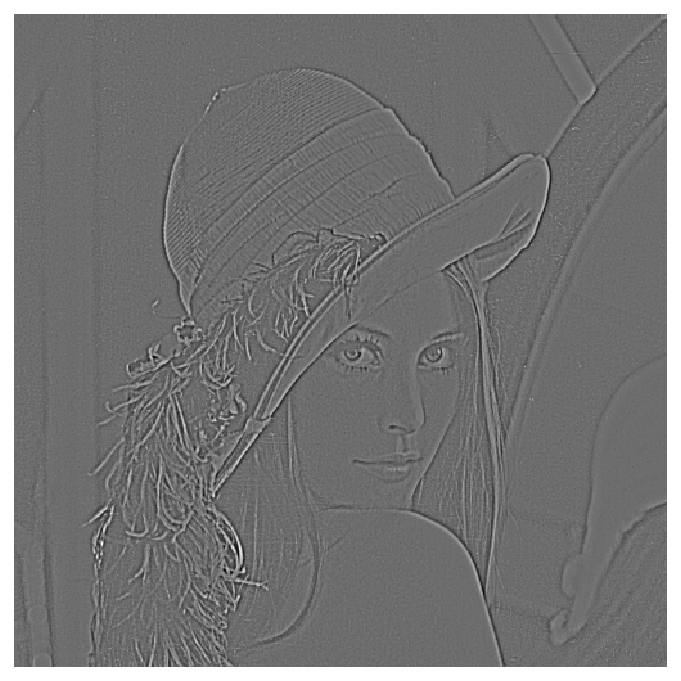

In [121]:
## 可视化卷积后的图像
plt.figure(figsize=(6,6))
plt.imshow(imconv2dout_im,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

这段代码用于可视化经过卷积操作后的图像。下面是对代码逐行进行注释解释：

```python
## 可视化卷积后的图像
plt.figure(figsize=(6, 6))
plt.imshow(imconv2dout_im, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
```

在这部分代码中，首先创建一个图形窗口，大小为`(6, 6)`。

然后使用`imshow()`函数将经过卷积操作后的图像`imconv2dout_im`显示在窗口中，利用`cmap=plt.cm.gray`参数选择灰度色彩映射来表示图像。

接下来，通过`plt.axis("off")`关闭坐标轴的显示。

最后，使用`plt.show()`来显示图像。

In [122]:
## 定义边缘检测卷积核,并纬度处理为1*1*5*5
kersize = 5
ker = torch.ones(kersize,kersize,dtype=torch.float32)*-1
ker[2,2] = 24
ker = ker.reshape((1,1,kersize,kersize))
## 进行卷积操作
conv2d = nn.Conv2d(1,2,(kersize,kersize),bias = False)
## 设置卷积时使用的核,第一个核使用边缘检测核
conv2d.weight.data[0] = ker
## 对灰度图像进行卷积操作
imconv2dout = conv2d(myimgray_t)
## 对卷积后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
print("卷积后尺寸:",imconv2dout_im.shape)

卷积后尺寸: torch.Size([2, 508, 508])


这段代码是使用PyTorch库进行边缘检测的操作，并且对卷积层定义了两个核。下面是对代码逐行进行注释解释：

```python
## 定义边缘检测卷积核,并将维度调整为1*1*5*5
kersize = 5
ker = torch.ones(kersize, kersize, dtype=torch.float32) * -1
ker[2, 2] = 24
ker = ker.reshape((1, 1, kersize, kersize))
```
在这部分代码中，我们先定义了一个大小为`5x5`的卷积核`ker`，初始值都设置为`-1`。然后我们将中心元素设为`24`，增加边缘检测的权重。最后，通过`reshape()`函数将卷积核的维度调整为`(1, 1, 5, 5)`。

```python
## 进行卷积操作
conv2d = nn.Conv2d(1, 2, (kersize, kersize), bias=False)
```
这行代码用于创建一个`Conv2d`对象，表示一个二维卷积层。参数`1, 2`表示输入和输出的通道数，第一个卷积核接收单通道输入（灰度图像），得到两个通道的输出。`(kersize, kersize)`表示卷积核的大小，即`(5, 5)`。`bias=False`表示不使用偏置项。

```python
## 设置卷积时使用的核,第一个核使用边缘检测核
conv2d.weight.data[0] = ker
```
这行代码将之前定义的卷积核`ker`赋值给我们创建的卷积层对象`conv2d`的权重属性`weight.data`中的第一个核。这样，第一个核将使用我们定义的边缘检测核进行卷积操作。

```python
## 对灰度图像进行卷积操作
imconv2dout = conv2d(myimgray_t)
```
这行代码对灰度图像`myimgray_t`进行卷积操作，结果存储在变量`imconv2dout`中。

```python
## 对卷积后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
```
这行代码将卷积后的输出通过`squeeze()`函数进行维度压缩，去除维度为1的尺寸。

```python
print("卷积后尺寸:", imconv2dout_im.shape)
```
最后，代码打印出卷积后的输出的尺寸。

In [123]:
## 查看使用的卷积核
conv2d.weight.data

tensor([[[[-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00,  2.4000e+01, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00],
          [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00]]],


        [[[-1.9498e-01,  9.3656e-02,  1.7555e-01,  1.2225e-01, -1.4163e-01],
          [-1.6122e-01,  8.3050e-02,  4.4917e-03,  8.1986e-02, -1.9543e-01],
          [-1.1925e-02,  1.4105e-01,  9.2782e-02,  7.3035e-03,  3.9324e-02],
          [-1.8936e-02, -1.0997e-01, -7.5580e-02, -1.2180e-01,  1.6612e-01],
          [ 1.1006e-01,  6.9945e-02, -1.5337e-01,  1.5432e-01,  6.2709e-02]]]])

这段代码用于打印输出所使用的卷积核（权重）的值。下面是对输出结果进行解释：

```python
conv2d.weight.data
```

这行代码访问了`conv2d`对象的权重数据。

输出结果是一个4维张量，具有形状为`(1, 2, kersize, kersize)`：
- 第一维度 `1` 表示当前卷积层的输入通道数。
- 第二维度 `2` 表示当前卷积层的输出通道数，这里我们定义了两个卷积核。
- 第三和第四维度 `(kersize, kersize)` 是卷积核的高度和宽度。

结果中第一个卷积核的值为：
```
[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
 [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
 [-1.0000, -1.0000,  24.0000, -1.0000, -1.0000],
 [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
 [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]]
```

第二个卷积核的值为：
```
[[-0.1950,  0.0937,  0.1756,  0.1223, -0.1416],
 [-0.1612,  0.0831,  0.0045,  0.0819, -0.1954],
 [-0.0119,  0.1411,  0.0928,  0.0073,  0.0393],
 [-0.0189, -0.1099, -0.0756, -0.1218,  0.1661],
 [ 0.1101,  0.0699, -0.1534,  0.1543,  0.0627]]
```

这些数值表示了卷积核中每个位置的权重值。首先展示了第一个卷积核，其效果是对图像进行边缘检测。第二个卷积核是自动学习得到的，可能用于其他特征提取任务。

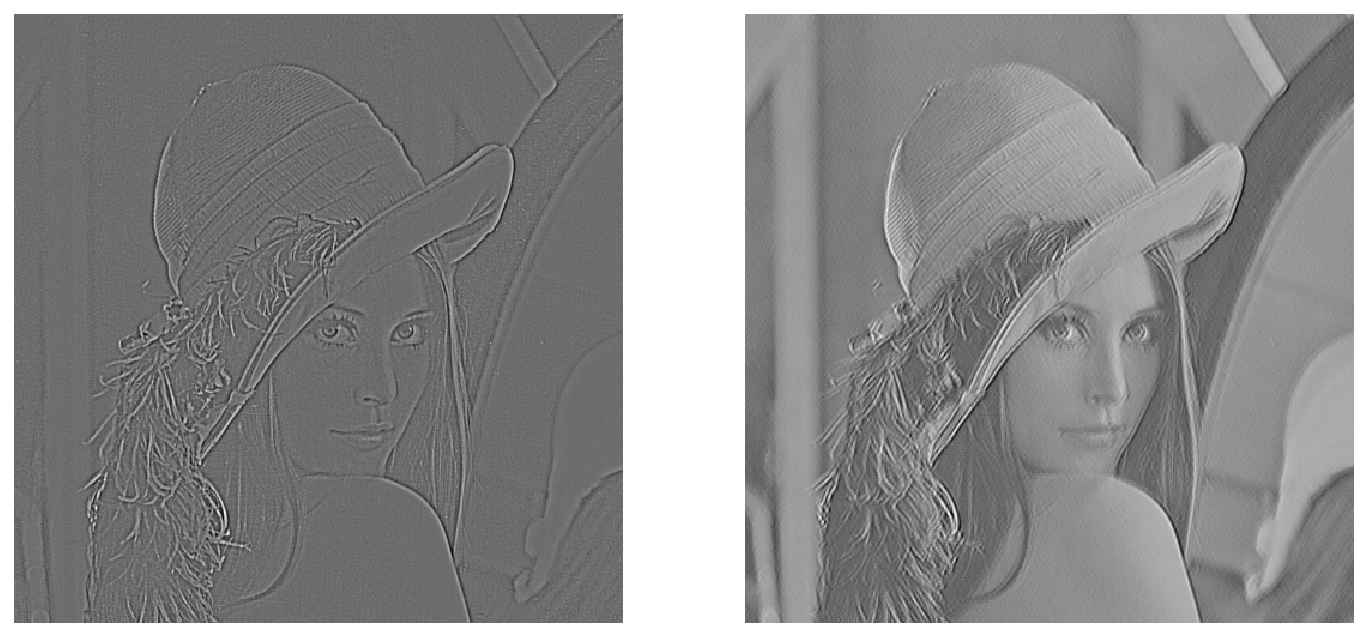

In [124]:
## 可视化卷积后的图像
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imconv2dout_im[0],cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(imconv2dout_im[1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

这段代码用于可视化经过卷积操作后的图像。下面是对代码逐行进行注释解释：

```python
## 可视化卷积后的图像
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imconv2dout_im[0], cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(imconv2dout_im[1], cmap=plt.cm.gray)
plt.axis("off")
plt.show()
```

首先，创建一个图形窗口，并将其大小设置为`(12, 6)`。

然后使用`plt.subplot()`函数来创建一个1行2列的子图布局。在这个布局中，第一个子图位于1行1列，第二个子图位于1行2列。

接下来，使用`plt.imshow()`函数将第一个卷积输出的图像（`imconv2dout_im`的第一个元素）显示在第一个子图中，利用`cmap=plt.cm.gray`参数选择灰度色彩映射来表示图像。

然后，通过`plt.axis("off")`关闭第一个子图的坐标轴显示。

接着，在第二个子图中，使用`plt.imshow()`函数将第二个卷积输出的图像（`imconv2dout_im`的第二个元素）显示出来。

同样地，使用`cmap=plt.cm.gray`参数选择灰度色彩映射来表示图像，并通过`plt.axis("off")`关闭第二个子图的坐标轴显示。

最后，使用`plt.show()`来显示图像。

### 常用的池化层

最大值池化、平均值池化与自适应平均值池化为例进行相关介绍

In [125]:
imconv2dout_im.shape

torch.Size([2, 508, 508])

这段代码用于打印输出卷积操作后得到的图像的尺寸。下面是对代码的解释：

```python
imconv2dout_im.shape
```

这行代码访问了变量`imconv2dout_im`的形状（尺寸）信息。

输出结果表示该张量有三个维度，尺寸分别为 `[2, 508, 508]`：
- 第一个维度 `2` 表示在卷积操作中所使用的两个不同的卷积核生成了两个输出通道。
- 后面两个维度 `508, 508` 表示每个输出通道的图像大小为 `508x508` 像素。

所以，输出的尺寸为 `(2, 508, 508)`，即代表两个具有 `508x508` 尺寸的图像。

#### 最大值池化

In [126]:
## 对卷积后的结果进行最大值池化
maxpool2 = nn.MaxPool2d(2,stride=2)
pool2_out = maxpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

torch.Size([1, 2, 254, 254])

这段代码同样是对卷积操作后的结果进行最大值池化操作，并打印输出池化后的结果的尺寸。以下是代码解释：

```python
## 对卷积后的结果进行最大值池化
maxpool2 = nn.MaxPool2d(2, stride=2)
```

这行代码创建了一个最大值池化操作对象`maxpool2`，其中参数`2`表示池化窗口大小和步长，实现了2倍下采样。

```python
pool2_out = maxpool2(imconv2dout)
```

这行代码将之前的卷积操作产生的`imconv2dout`作为输入，通过最大值池化操作`maxpool2`，得到池化后的结果存储在变量`pool2_out`中。

```python
pool2_out_im = pool2_out.squeeze()
```

这行代码使用`squeeze()`函数对池化后的结果进行维度压缩，去除维度为1的尺寸，并将结果存储在变量`pool2_out_im`中。

```python
pool2_out.shape
```

这行代码打印输出了池化后结果的尺寸（形状）。结果显示形状为`(1, 2, 254, 254)`，表示经过最大值池化后获得了一个具有以下尺寸特征的张量：
- 第一个维度 `1`：表示这个张量包含一个图像。
- 第二个维度 `2`：表示这个图像有两个通道。
- 第三和第四个维度 `254`：表示每个通道的图像大小为254x254像素。

因此，经过最大值池化操作后，生成了一个尺寸减小并具有更少通道的特征图。

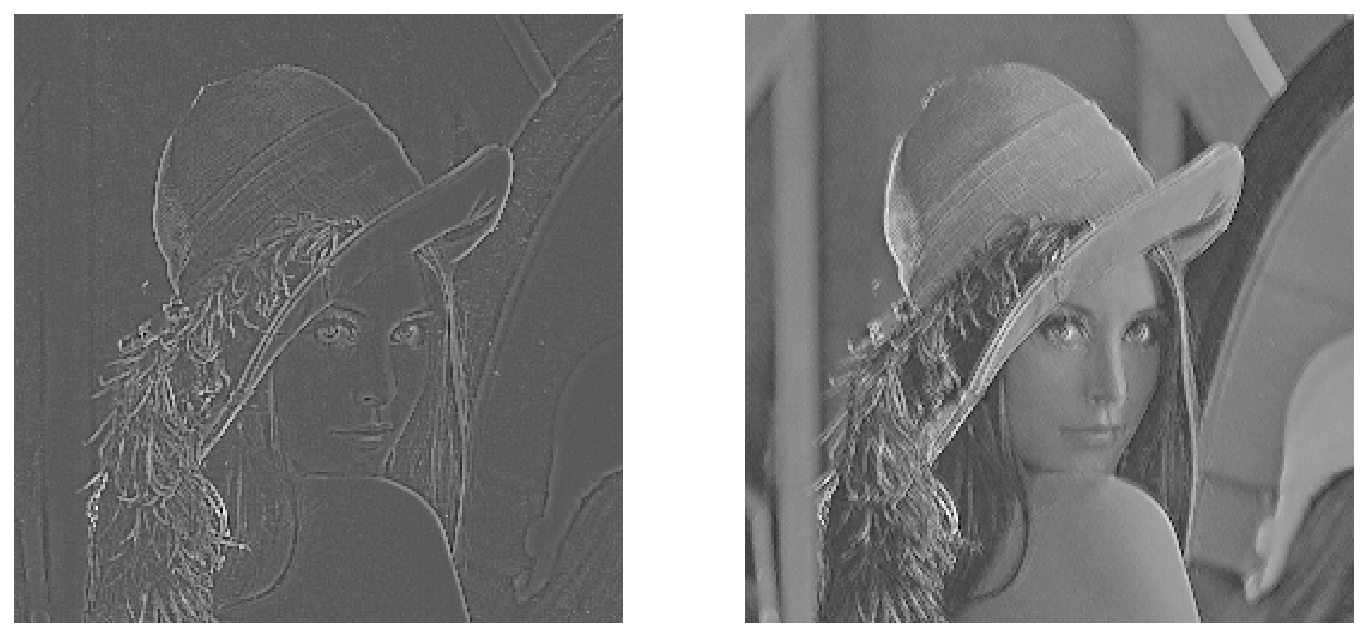

In [127]:
## 可视化最大值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

这段代码用于可视化经过最大值池化操作后的结果。以下是对每行代码的解释：

```python
## 可视化最大值池化后的结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pool2_out_im[0].data, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(pool2_out_im[1].data, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
```

首先，创建一个图形窗口，并将其大小设置为 `(12, 6)`。

然后，使用 `plt.subplot()` 函数创建一个1行2列的子图布局。在该布局中，第一个子图位于1行1列，第二个子图位于1行2列。

接下来，在第一个子图中，使用 `plt.imshow()` 函数显示经过最大值池化操作后的结果中的第一个通道（`pool2_out_im` 的第一个元素），并选择灰度色彩映射 `cmap=plt.cm.gray` 来表示图像。

紧接着，通过 `plt.axis("off")` 关闭第一个子图的坐标轴显示。

然后，在第二个子图中，使用 `plt.imshow()` 函数显示经过最大值池化操作后的结果中的第二个通道（`pool2_out_im` 的第二个元素），并同样选择灰度色彩映射 `cmap=plt.cm.gray` 来表示图像。

同样地，通过 `plt.axis("off")` 关闭第二个子图的坐标轴显示。

最后，使用 `plt.show()` 来显示图像。

#### 平均值池化

In [128]:
## 对卷积后的结果进行平均值池化
avgpool2 = nn.AvgPool2d(2,stride=2)
pool2_out = avgpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

torch.Size([1, 2, 254, 254])

这段代码用于对卷积操作后的结果进行平均值池化操作，并输出池化后的结果的尺寸。以下是对每行代码的解释：

```python
## 对卷积后的结果进行平均值池化
avgpool2 = nn.AvgPool2d(2, stride=2)
```
这行代码创建了一个平均值池化操作对象`avgpool2`。参数`2`表示池化窗口的大小及步幅（窗口每次平移2个像素），实现了2倍下采样。

```python
pool2_out = avgpool2(imconv2dout)
```
这行代码将之前卷积操作得到的`imconv2dout`作为输入，通过平均值池化操作`avgpool2`来获取池化后的结果，存储在变量`pool2_out`中。

```python
pool2_out_im = pool2_out.squeeze()
```
这行代码使用`squeeze()`函数对池化后的结果进行维度压缩，去除维度为1的尺寸，存储在变量`pool2_out_im`中。

```python
pool2_out.shape
```
这行代码打印输出了池化后的结果的尺寸（形状）。结果显示形状为`(2, 254, 254)`，意味着经过平均值池化后，图像的通道数保持不变，而宽度和高度均减少了一半（254代替508）。

因此，通过平均值池化操作，得到了尺寸减小的特征图，每个窗口的值被取为相应区域内像素的平均值。

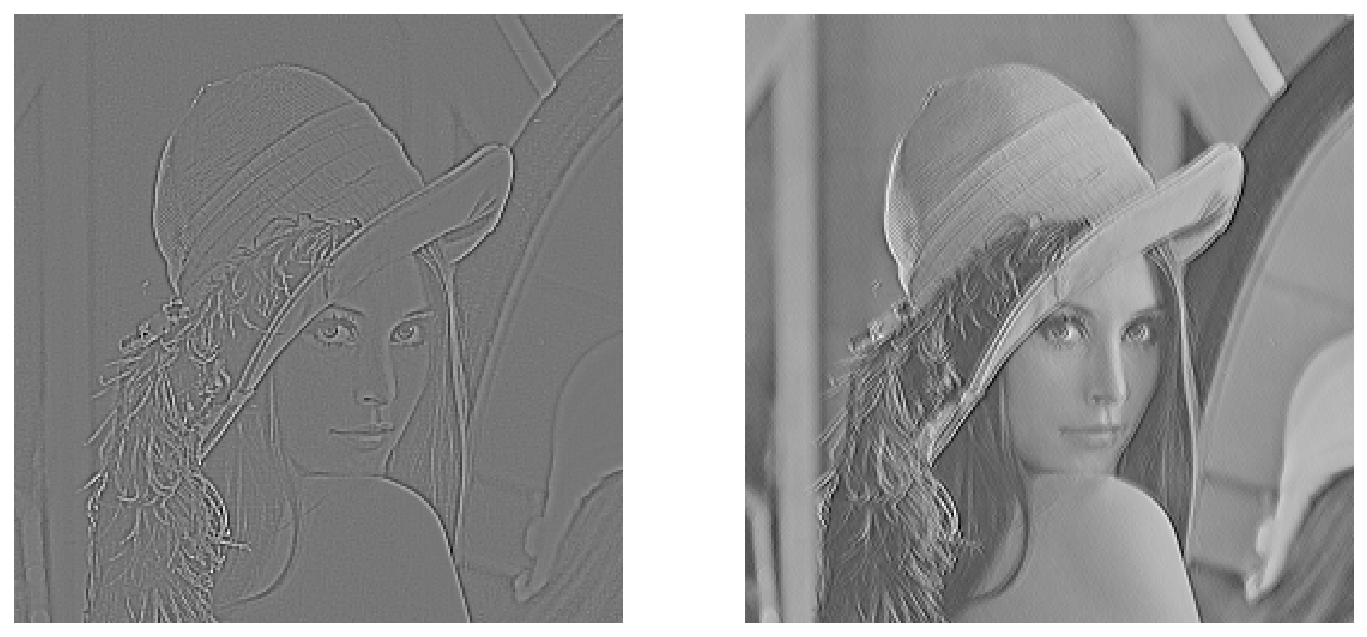

In [129]:
## 可视化平均值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

这段代码用于可视化经过平均值池化操作后的结果。以下是对每行代码的解释：

```python
## 可视化平均值池化后的结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pool2_out_im[0].data, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(pool2_out_im[1].data, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
```

首先，创建一个图形窗口，并将其大小设置为`(12, 6)`。

然后使用`plt.subplot()`函数创建一个1行2列的子图布局。在该布局中，第一个子图位于1行1列，第二个子图位于1行2列。

接下来，在第一个子图中，使用`plt.imshow()`函数显示经过平均值池化操作后的结果中的第一个通道（`pool2_out_im`的第一个元素），并选择灰度色彩映射`cmap=plt.cm.gray`来表示图像。

紧接着，通过`plt.axis("off")`关闭第一个子图的坐标轴显示。

然后，在第二个子图中，使用`plt.imshow()`函数显示经过平均值池化操作后的结果中的第二个通道（`pool2_out_im`的第二个元素），并同样选择灰度色彩映射`cmap=plt.cm.gray`来表示图像。

同样地，通过`plt.axis("off")`关闭第二个子图的坐标轴显示。

最后，使用`plt.show()`来显示图像。

#### 自适应平均值池化

In [130]:
## 对卷积后的结果进行自适应平均值池化
AdaAvgpool2 = nn.AdaptiveAvgPool2d(output_size = (100,100))
pool2_out = AdaAvgpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

torch.Size([1, 2, 100, 100])

这段代码用于对卷积操作后的结果进行自适应平均值池化操作，并输出池化后的结果的尺寸。以下是对每行代码的解释：

```python
## 对卷积后的结果进行自适应平均值池化
AdaAvgpool2 = nn.AdaptiveAvgPool2d(output_size=(100, 100))
```

这行代码创建了一个自适应平均值池化操作对象`AdaAvgpool2`，其输出大小为`(100, 100)`。根据输入的尺寸和输出大小，自适应平均值池化会根据输出大小自动调整池化窗口的大小和步幅，从而进行下采样。

```python
pool2_out = AdaAvgpool2(imconv2dout)
```

这行代码将之前卷积操作得到的`imconv2dout`作为输入，通过自适应平均值池化操作`AdaAvgpool2`来获取池化后的结果，存储在变量`pool2_out`中。

```python
pool2_out_im = pool2_out.squeeze()
```

这行代码使用`squeeze()`函数对池化后的结果进行维度压缩，去除维度为1的尺寸，存储在变量`pool2_out_im`中。

```python
pool2_out.shape
```

这行代码打印输出了池化后的结果的尺寸（形状）。结果显示形状为`(1, 2, 100, 100)`，表示经过自适应平均值池化后获得了一个具有以下尺寸特征的张量：
- 第一个维度 `1`：表示这个张量包含一个图像。
- 第二个维度 `2`：表示这个图像有两个通道。
- 第三和第四个维度 `100`：表示每个通道的图像大小为100x100像素。

因此，通过自适应平均值池化操作，得到了一个尺寸为100x100的特征图，不论输入图像的大小是多少。

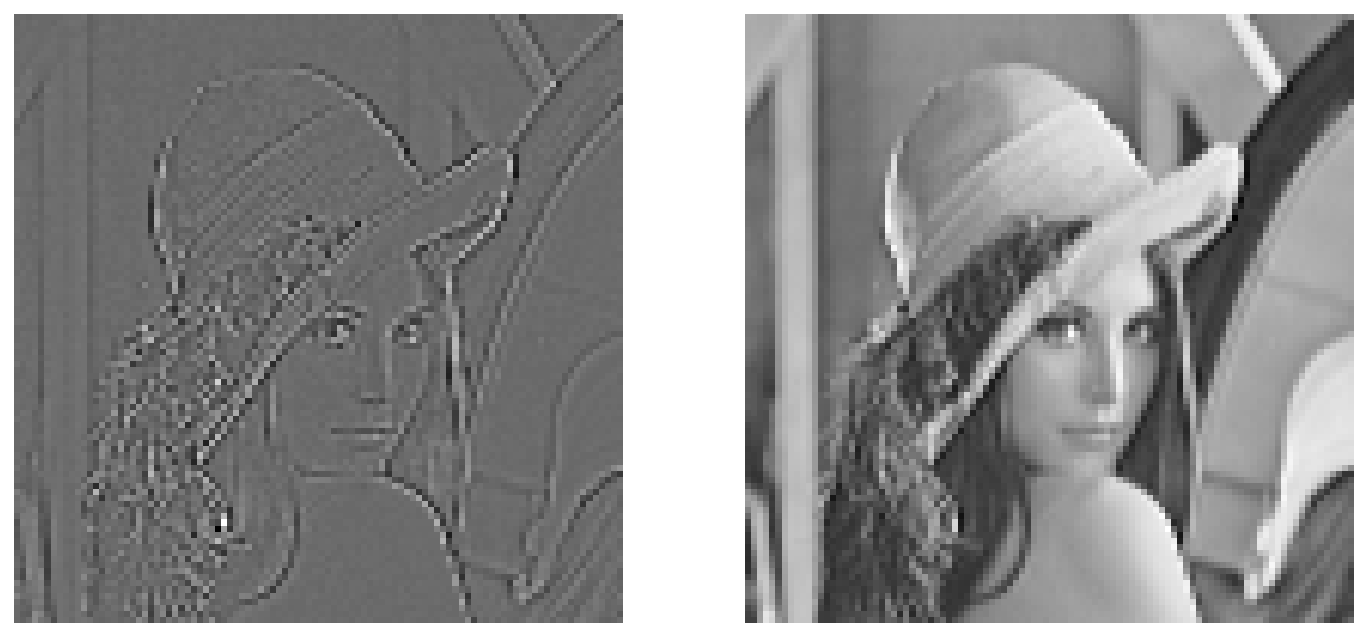

In [131]:
## 可视化自适应平均值池化后的结果
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

这段代码用于可视化经过自适应平均值池化操作后的结果。以下是对每行代码的解释：

```python
## 可视化自适应平均值池化后的结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pool2_out_im[0].data, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(pool2_out_im[1].data, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
```

首先，创建一个图形窗口，并将其大小设置为`(12, 6)`。

然后使用`plt.subplot()`函数创建一个1行2列的子图布局。在该布局中，第一个子图位于1行1列，第二个子图位于1行2列。

接下来，在第一个子图中，使用`plt.imshow()`函数显示经过自适应平均值池化操作后的结果中的第一个通道（`pool2_out_im`的第一个元素），并选择灰度色彩映射`cmap=plt.cm.gray`来表示图像。

紧接着，通过`plt.axis("off")`关闭第一个子图的坐标轴显示。

然后，在第二个子图中，使用`plt.imshow()`函数显示经过自适应平均值池化操作后的结果中的第二个通道（`pool2_out_im`的第二个元素），并同样选择灰度色彩映射`cmap=plt.cm.gray`来表示图像。

同样地，通过`plt.axis("off")`关闭第二个子图的坐标轴显示。

最后，使用`plt.show()`来显示图像。

### 激活函数

In [132]:
x = torch.linspace(-6,6,100)
## Sigmoid激活函数
sigmoid = nn.Sigmoid()
ysigmoid = sigmoid(x)
## Tanh激活函数
tanh = nn.Tanh()
ytanh = tanh(x)
## ReLU激活函数
relu = nn.ReLU()
yrelu = relu(x)
## Softplus激活函数
softplus = nn.Softplus()
ysoftplus = softplus(x)

这段代码用于计算并存储四种常见的激活函数（Sigmoid、Tanh、ReLU和Softplus）在给定输入 `x` 上的输出结果。以下是对每行代码的解释：

```python
x = torch.linspace(-6, 6, 100)
```

这行代码创建了一个包含从 `-6` 到 `6` 的等间隔数值的张量 `x`，总共有 `100` 个元素。

```python
## Sigmoid激活函数
sigmoid = nn.Sigmoid()
ysigmoid = sigmoid(x)
```

这部分代码定义了 `Sigmoid` 激活函数对象并命名为 `sigmoid`，然后将输入 `x` 传递给 `sigmoid` 进行计算并将结果赋值给变量 `ysigmoid`。

```python
## Tanh激活函数
tanh = nn.Tanh()
ytanh = tanh(x)
```

这部分代码类似于上述代码，创建了一个 `Tanh` 激活函数对象并命名为 `tanh`，然后将输入 `x` 传递给 `tanh` 进行计算并将结果赋值给变量 `ytanh`。

```python
## ReLU激活函数
relu = nn.ReLU()
yrelu = relu(x)
```

这部分代码类似于上述代码，创建了一个 `ReLU` 激活函数对象并命名为 `relu`，然后将输入 `x` 传递给 `relu` 进行计算并将结果赋值给变量 `yrelu`。

```python
## Softplus激活函数
softplus = nn.Softplus()
ysoftplus = softplus(x)
```

这部分代码类似于上述代码，创建了一个 `Softplus` 激活函数对象并命名为 `softplus`，然后将输入 `x` 传递给 `softplus` 进行计算并将结果赋值给变量 `ysoftplus`。

因此，通过运行这段代码，可以得到四种激活函数在给定输入 `x` 上的输出结果分别保存在变量 `ysigmoid`、`ytanh`、`yrelu` 和 `ysoftplus` 中。

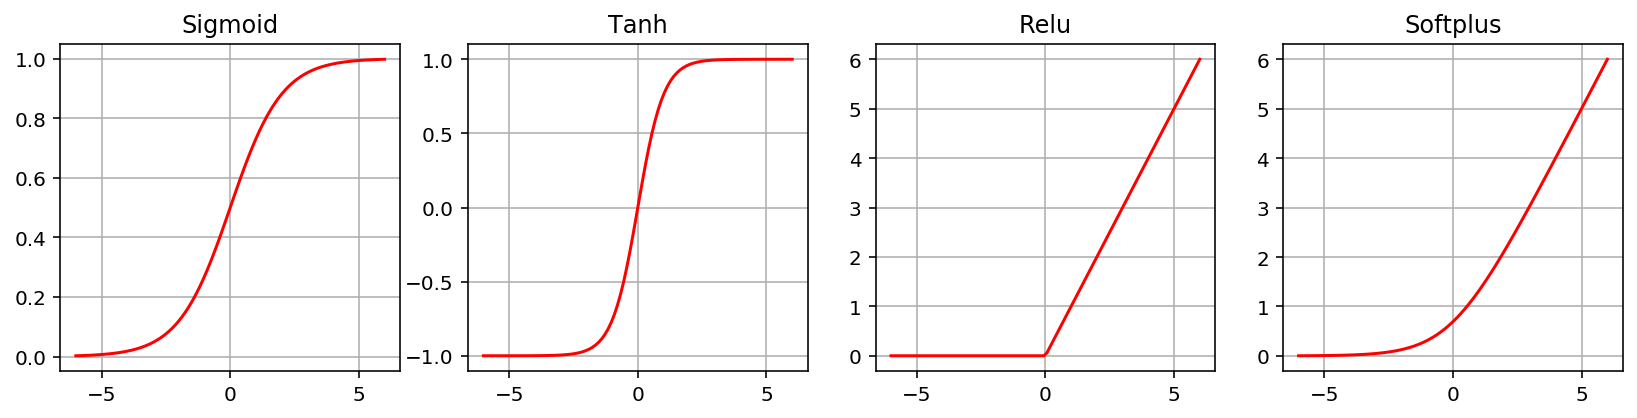

In [133]:
## 可视化激活函数
plt.figure(figsize=(14,3))
plt.subplot(1,4,1)
plt.plot(x.data.numpy(),ysigmoid.data.numpy(),"r-")
plt.title("Sigmoid")
plt.grid()
plt.subplot(1,4,2)
plt.plot(x.data.numpy(),ytanh.data.numpy(),"r-")
plt.title("Tanh")
plt.grid()
plt.subplot(1,4,3)
plt.plot(x.data.numpy(),yrelu.data.numpy(),"r-")
plt.title("Relu")
plt.grid()
plt.subplot(1,4,4)
plt.plot(x.data.numpy(),ysoftplus.data.numpy(),"r-")
plt.title("Softplus")
plt.grid()
plt.show()

这段代码用于可视化四种激活函数的输出结果。以下是对每行代码的解释：

```python
## 可视化激活函数
plt.figure(figsize=(14, 3))
plt.subplot(1, 4, 1)
plt.plot(x.data.numpy(), ysigmoid.data.numpy(), "r-")
plt.title("Sigmoid")
plt.grid()
plt.subplot(1, 4, 2)
plt.plot(x.data.numpy(), ytanh.data.numpy(), "r-")
plt.title("Tanh")
plt.grid()
plt.subplot(1, 4, 3)
plt.plot(x.data.numpy(), yrelu.data.numpy(), "r-")
plt.title("ReLU")
plt.grid()
plt.subplot(1, 4, 4)
plt.plot(x.data.numpy(), ysoftplus.data.numpy(), "r-")
plt.title("Softplus")
plt.grid()
plt.show()
```

首先，创建一个图形窗口，并将其大小设置为`(14, 3)`。

然后使用`plt.subplot()`函数创建一个1行4列的子图布局。在该布局中，第一个子图位于1行1列，第二个子图位于1行2列，以此类推。

接下来，在第一个子图中，使用`plt.plot()`函数绘制 `x` 和 `ysigmoid` 的曲线，曲线颜色为红色 `r-`。通过`plt.title()`函数设置子图标题为"Sigmoid"。

紧接着，使用`plt.grid()`函数显示网格线。

然后，在第二个子图中，绘制 `x` 和 `ytanh` 的曲线，并设置子图标题为"Tanh"。

同样地，在第三和第四个子图中，分别绘制 `x` 和对应的激活函数输出结果。然后设置子图标题为"Relu"和"Softplus"。

最后，通过`plt.show()`函数来显示可视化的图像。

## Pytorch中数据操作和预处理

### 高维数组

1:回归数据

2:分类数据

In [3]:
import torch
import torch.utils.data as Data
from sklearn.datasets import load_boston,load_iris

In [135]:
## 读取波士顿回归数据
boston_X,boston_y = load_boston(return_X_y=True)
print("boston_X.dtype:",boston_X.dtype)
print("boston_y.dtype:",boston_y.dtype)

boston_X.dtype: float64
boston_y.dtype: float64


这段代码的主要目的是读取波士顿回归数据集并打印出其中X（特征）和y（目标变量）的数据类型。

特征(`boston x`)是一个包含了波士顿地区506个城镇的13个特征的数组矩阵。每行代表一个城镇，每列代表一个特征

目标变量(`boston_y`)是一个包含了波士顿地区506个城镇的房价中位数的一维数组每个房价中位数对应于一个城镇

首先，代码使用`load_boston(return_X_y=True)`函数从包含波士顿回归数据集的库中加载数据，并将X和y分别赋值给`boston_X`和`boston_y`变量。`return_X_y=True`的设置使得函数返回特征矩阵X和目标变量y。

接下来，代码打印了X和y的数据类型信息。

- `boston_X.dtype`打印了X的数据类型，其结果是`float64`，表示X中的特征数据是浮点类型。
- `boston_y.dtype`打印了y的数据类型，其结果也是`float64`，表示y中的目标变量数据是浮点类型。

因此，通过这段代码我们可以得到关于波士顿回归数据集的以下信息：
- 特征矩阵X的数据类型为浮点类型（`float64`）。
- 目标变量y的数据类型也为浮点类型（`float64`）。

波士顿回归数据集是一个常用的机器学习数据集，用于回归问题的实验和模型训练。它包含了波士顿地区的住房价格以及一些与价格相关的特征（比如犯罪率、房屋平均房间数等）。通过使用这个数据集，我们可以建立一个回归模型，根据给定的特征预测房屋的价格。

波士顿回归数据集是一个经典的机器学习数据集，用于预测波士顿地区房价的回归问题。该数据集收集了1970年代中期在波士顿地区的506个区域（城镇）的13个特征及其对应的房价中位数。这些特征是基于当地人口普查数据计算得出的。

以下是波士顿回归数据集的特征：

1. CRIM：城镇人均犯罪率。
2. ZN：每个城镇中占地面积超过25,000平方英尺的住宅用地比例。
3. INDUS：每个城镇非零售商业土地的比例。
4. CHAS：查尔斯河虚拟变量（若距离大于河流则为0，否则为1）。
5. NOX：一氧化氮浓度（单位：百万分之一）。
6. RM：每栋住宅的平均房间数。
7. AGE：1940年前建造的自住单位比例。
8. DIS：距离五个波士顿就业中心的加权距离。
9. RAD：辐射性公路的可达性指数。
10. TAX：每$10,000的全值财产税率。
11. PTRATIO：城镇师生比例。
12. B：1000(Bk - 0.63)^2，其中Bk是城镇中非黑人的比例。
13. LSTAT：低社会地位人口的百分比。

这些特征以及相应区域房价的中位数标签（单位：千美元）构成了数据集。

波士顿回归数据集广泛用于回归问题的模型训练和评估，以及特征选择和数据可视化等任务。通过使用这个数据集，可以探索不同特征与房价之间的关系，并建立回归模型来预测未知区域的房价。

在Python中，没有像R语言中的`str()`函数一样直接查看数据集结构的内置函数。但是，您可以使用其他方法来了解波士顿回归数据集的结构。

一种常用的方法是使用pandas库。您可以将波士顿回归数据集转换为pandas的DataFrame对象，并使用`info()`函数或`head()`函数来查看数据集的结构信息和前几行数据。

以下是使用pandas查看波士顿回归数据集结构的示例代码：

```python
import pandas as pd
from sklearn.datasets import load_boston

boston_data = load_boston()
df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

# 使用info()函数查看数据集结构信息
print("波士顿回归数据集的结构信息：")
df.info()

# 使用head()函数查看数据集的前几行数据
print("\n波士顿回归数据集的前5行数据：")
print(df.head())
```

运行以上代码，在终端中就可以查看到波士顿回归数据集的结构信息和前五行数据。

此外，还可以使用numpy库获取数据集的形状（shape）。例如：

```python
from sklearn.datasets import load_boston

boston_X, _ = load_boston(return_X_y=True)
print("波士顿回归数据集的形状：", boston_X.shape)
```

以上代码将输出波士顿回归数据集的形状，结果类似于`(506, 13)`，表示该数据集包含506个样本和13个特征。

In [136]:
## 训练集X转化为张量,训练集y转化为张量
train_xt = torch.from_numpy(boston_X.astype(np.float32))
train_yt = torch.from_numpy(boston_y.astype(np.float32))
print("train_xt.dtype:",train_xt.dtype)
print("train_xt.dtype:",train_yt.dtype)

train_xt.dtype: torch.float32
train_xt.dtype: torch.float32


这段代码将训练集X和训练集y转换为张量（tensors）的形式，并打印出它们的数据类型。

首先，`boston_X`和`boston_y`是分别表示训练集X和训练集y的NumPy数组。`np.float32`是指定数据类型为32位浮点数。

```python
train_xt = torch.from_numpy(boston_X.astype(np.float32))
```
上面这行代码将`boston_X`转换为张量（tensor）并保存到变量`train_xt`中。`torch.from_numpy()`函数用于从NumPy数组创建张量，`.astype(np.float32)`将`boston_X`的数据类型强制转换为32位浮点数，以符合要求。

```python
train_yt = torch.from_numpy(boston_y.astype(np.float32))
```
同样地，这行代码将`boston_y`转换为张量（tensor）并保存到变量`train_yt`中。

接下来，使用`print()`函数打印出两个张量的数据类型：
```python
print("train_xt.dtype:",train_xt.dtype)
print("train_xt.dtype:",train_yt.dtype)
```
结果显示两个张量的数据类型都是`torch.float32`，即32位浮点数类型。

因为torch构建的网络中默认的数据格式是torch.float32，所以转化为张量时，也要先讲numpy数据转化为32位浮点型

In [137]:
## 将训练集转化为张量后,使用TensorDataset将X和Y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)
## 定义一个数据加载器，将训练数据集进行批量处理
train_loader = Data.DataLoader(
    dataset = train_data, ## 使用的数据集
    batch_size=64, # 批处理样本大小
    shuffle = True, # 每次迭代前打乱数据
    num_workers = 1, # 使用两个进程 
)

##  检查训练数据集的一个batch的样本的维度是否正确
for step, (b_x, b_y) in enumerate(train_loader):  
    if step > 0:
        break
## 输出训练图像的尺寸和标签的尺寸，和数据类型
print("b_x.shape:",b_x.shape)
print("b_y.shape:",b_y.shape)
print("b_x.dtype:",b_x.dtype)
print("b_y.dtype:",b_y.dtype)

b_x.shape: torch.Size([64, 13])
b_y.shape: torch.Size([64])
b_x.dtype: torch.float32
b_y.dtype: torch.float32


这段代码主要是将训练集转换为张量（tensors）后，使用`TensorDataset`和`DataLoader`对训练数据进行处理，并检查一个batch的样本的维度和数据类型。

```python
train_data = Data.TensorDataset(train_xt,train_yt)
```
上述代码将训练集X（`train_xt`）和训练集y（`train_yt`）整理到一起，创建了一个`TensorDataset`对象，将其保存在`train_data`中。这样做可以方便后续对训练数据进行批处理。

```python
train_loader = Data.DataLoader(
    dataset = train_data,
    batch_size=64,
    shuffle = True,
    num_workers = 1,
)
```
上面这段代码定义了一个数据加载器（`train_loader`），用于对训练数据进行批量处理。其中：
- `dataset`参数指定使用的数据集，即之前创建的`train_data`。
- `batch_size`参数表示每个批次处理的样本数量，此处设为64。
- `shuffle`参数表示是否每次迭代前打乱数据顺序，设置为True表示会打乱数据的顺序。
- `num_workers`参数指定用于数据加载的进程数量，此处设置为1个进程。

接下来，通过循环遍历加载器中的数据来获取一个batch的样本并进行检查：
```python
for step, (b_x, b_y) in enumerate(train_loader):  
    if step > 0:
        break
```
其中，`(b_x, b_y)`是返回的一个batch的样本和标签。

最后，使用`print()`函数打印出一个batch的样本的维度和数据类型信息：
```python
print("b_x.shape:",b_x.shape)
print("b_y.shape:",b_y.shape)
print("b_x.dtype:",b_x.dtype)
print("b_y.dtype:",b_y.dtype)
```
上述代码将显示<b>x</b>的形状为`torch.Size([64, 13])`，表示每个批次中有64个样本，每个样本含有13个特征。而<b>y</b>的形状为`torch.Size([64])`，说明每个批次样本对应的标签数量为64。此外，这两个张量的数据类型都是`torch.float32`，即32位浮点数类型。

In [138]:
## 处理分类数据
iris_x,irisy = load_iris(return_X_y=True)
print("iris_x.dtype:",iris_x.dtype)
print("irisy:",irisy.dtype)

iris_x.dtype: float64
irisy: int64


In [139]:
## 训练集X转化为张量,训练集y转化为张量
train_xt = torch.from_numpy(iris_x.astype(np.float32))
train_yt = torch.from_numpy(irisy.astype(np.int64))
print("train_xt.dtype:",train_xt.dtype)
print("train_xt.dtype:",train_yt.dtype)

train_xt.dtype: torch.float32
train_xt.dtype: torch.int64


因为torch构建的网络中默认的数据格式是torch.float32，所以转化为张量时，数据的特征要转化为32位浮点型，数据的类别标签，要转化为64位有符号整型

In [140]:
## 将训练集转化为张量后,使用TensorDataset将X和Y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)
## 定义一个数据加载器，将训练数据集进行批量处理
train_loader = Data.DataLoader(
    dataset = train_data, ## 使用的数据集
    batch_size=10, # 批处理样本大小
    shuffle = True, # 每次迭代前打乱数据
    num_workers = 1, # 使用两个进程 
)

##  检查训练数据集的一个batch的样本的维度是否正确
for step, (b_x, b_y) in enumerate(train_loader):  
    if step > 0:
        break
## 输出训练图像的尺寸和标签的尺寸，和数据类型
print("b_x.shape:",b_x.shape)
print("b_y.shape:",b_y.shape)
print("b_x.dtype:",b_x.dtype)
print("b_y.dtype:",b_y.dtype)

b_x.shape: torch.Size([10, 4])
b_y.shape: torch.Size([10])
b_x.dtype: torch.float32
b_y.dtype: torch.int64


### 图像数据预处理

1:从torchvision中直接加载

2:从文件中读取

In [141]:
import torch
import torch.utils.data as Data
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [142]:
## 使用FashionMNIST数据，准备训练数据集
train_data  = FashionMNIST(
    root = "./data/FashionMNIST", # 数据的路径
    train = True, # 只使用训练数据集
    transform  = transforms.ToTensor(),
    download= False  #因为数据已经下载过，所以这里不再下载
)
## 定义一个数据加载器
train_loader = Data.DataLoader(
    dataset = train_data, ## 使用的数据集
    batch_size=64, # 批处理样本大小
    shuffle = True, # 每次迭代前打乱数据
    num_workers = 2, # 使用两个进程 
)
## 计算train_loader有多少个batch
print("train_loader的batch数量为:",len(train_loader))

train_loader的batch数量为: 938


In [143]:
## 对测试集进行处理
test_data  = FashionMNIST(
    root = "./data/FashionMNIST", # 数据的路径
    train = False, # 不使用训练数据集
    download= False # 因为数据已经下载过，所以这里不再下载
)
## 为数据添加一个通道纬度,并且取值范围缩放到0～1之间
test_data_x = test_data.data.type(torch.FloatTensor) / 255.0
test_data_x = torch.unsqueeze(test_data_x,dim = 1)
test_data_y = test_data.targets  ## 测试集的标签
print("test_data_x.shape:",test_data_x.shape)
print("test_data_y.shape:",test_data_y.shape)

test_data_x.shape: torch.Size([10000, 1, 28, 28])
test_data_y.shape: torch.Size([10000])


In [144]:
## 2 从文件夹中读取图像数据，并对齐进行预处理

In [145]:
## 对训练集的预处理
train_data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),# 随机长宽比裁剪为224*224
    transforms.RandomHorizontalFlip(),# 依概率p=0.5水平翻转
    transforms.ToTensor(), # 转化为张量并归一化至[0-1]
    ## 图像标准化处理
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])
## 读取图像
train_data_dir = "data/chap2/imagedata/"
train_data = ImageFolder(train_data_dir, transform=train_data_transforms)
train_data_loader = Data.DataLoader(train_data,batch_size=4,
                                    shuffle=True,num_workers=1)

print("数据集的label:",train_data.targets)

##  获得一个batch的数据
for step, (b_x, b_y) in enumerate(train_data_loader):  
    if step > 0:
        break
## 输出训练图像的尺寸和标签的尺寸
print(b_x.shape)
print(b_y.shape)
print("图像的取值范围为:",b_x.min(),"~",b_x.max())


数据集的label: [0, 0, 1, 2]
torch.Size([4, 3, 224, 224])
torch.Size([4])
图像的取值范围为: tensor(-2.1179) ~ tensor(2.6400)


### 文本数据预处理


In [5]:
## 使用torchtext库进行数据准备
from torchtext import data
## 定义文本切分方法,使用空格切分即可
mytokenize = lambda x: x.split()
## 定义将文本转化为张量的相关操作
TEXT = data.Field(sequential=True,     # 表明输入的文本是字符
                  tokenize=mytokenize, # 使用自定义的分词方法
                  use_vocab=True,      # 创建一个词汇表
                  batch_first=True,    # batch优先的数据方式
                  fix_length=200       # 每个句子固定长度为200
                 )
## 定义将标签转化为张量的相关操作
LABEL = data.Field(sequential=False, # 表明输入的标签是数字
                   use_vocab=False,  # 不创建词汇表
                   pad_token=None,   # 不进行填充
                   unk_token=None    # 没有无法识别的字符
                  )
## 对所要读取的数据集的每列进行处理
text_data_fields = [
    ("label", LABEL),  # 对标签的操作
    ("text", TEXT)     # 对文本的操作
]
## 读取数据
traindata,testdata = data.TabularDataset.splits(
    path="data/chap2/textdata", format="csv", 
    train="train.csv", fields=text_data_fields, 
    test = "test.csv", skip_header=True
)
## 可以发现训练集和测试集中都有4和样本
len(traindata),len(testdata)

(4, 4)

In [148]:
em = traindata.examples[0]
print(em.label)
print(em.text)

1
['went', 'saw', 'movie', 'last', 'night', 'coaxed', 'friends', 'mine', 'admit', 'reluctant', 'see', 'knew', 'ashton', 'kutcher', 'able', 'comedy', 'wrong', 'kutcher', 'played', 'character', 'jake', 'fischer', 'well', 'kevin', 'costner', 'played', 'ben', 'randall', 'professionalism', 'sign', 'good', 'movie', 'toy', 'emotions', 'one', 'exactly', 'entire', 'theater', 'sold', 'overcome', 'laughter', 'first', 'half', 'movie', 'moved', 'tears', 'second', 'half', 'exiting', 'theater', 'saw', 'many', 'women', 'tears', 'many', 'full', 'grown', 'men', 'well', 'trying', 'desperately', 'let', 'anyone', 'see', 'crying', 'movie', 'great', 'suggest', 'go', 'see', 'judge']


In [149]:
## 使用训练集构建单词表,并不指定预训练好的词项量
TEXT.build_vocab(traindata,max_size=1000,vectors = None)
## 将训练数据集定义为数据加载器，便于对模型进行优化
train_iter = data.BucketIterator(traindata,batch_size = 4)
test_iter = data.BucketIterator(testdata,batch_size = 4)
for step, batch in enumerate(train_iter):  
    if step > 0:
        break
## 针对一个batch 的数据，可以使用batch.label获得数据的类别标签
print("数据的类别标签:",batch.label)
## batch.text是文本对应的编码向量
print("数据的尺寸:",batch.text.shape)

数据的类别标签: tensor([0, 1, 0, 1])
数据的尺寸: torch.Size([4, 200])
